Libraries 

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Read in Data

In [ ]:

TRAIN = pd.read_csv("OB_train.csv")
TEST = pd.read_csv("OB_test.csv")

print(TRAIN.head())

   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473

Decision Tree

In [ ]:

label_encoder_gender = LabelEncoder()
label_encoder_family = LabelEncoder()

TRAIN['Gender'] = label_encoder_gender.fit_transform(TRAIN['Gender'])
TRAIN['family_history_with_overweight'] = label_encoder_family.fit_transform(TRAIN['family_history_with_overweight'])


X = TRAIN[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight']]
y = TRAIN['NObeyesdad']


label_encoder_target = LabelEncoder()
y_encoded = label_encoder_target.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=8555)

# Tree model
modelDT = tree()
modelDT.fit(X_train, y_train)

# Predictions
y_pred = modelDT.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder_target.classes_))



Accuracy: 0.8386319845857418

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.89      0.89       494
      Normal_Weight       0.82      0.79      0.80       651
     Obesity_Type_I       0.77      0.82      0.79       545
    Obesity_Type_II       0.95      0.93      0.94       653
   Obesity_Type_III       0.99      0.99      0.99       791
 Overweight_Level_I       0.66      0.68      0.67       495
Overweight_Level_II       0.70      0.67      0.68       523

           accuracy                           0.84      4152
          macro avg       0.82      0.83      0.82      4152
       weighted avg       0.84      0.84      0.84      4152



Predictions on Test Data

In [ ]:

X_final_test = TEST[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight']]


y_test_pred = modelDT.predict(X_final_test)


y_test_pred_labels = label_encoder_target.inverse_transform(y_test_pred)


TEST['NObeyesdad'] = y_test_pred_labels


first_col_name = TEST.columns[0]
output_df = TEST[[first_col_name, 'NObeyesdad']]


print(output_df.head())

# Save to CSV
#output_df.to_csv('DT_predictions.csv', index=False)


      id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761     Obesity_Type_II
4  20762    Obesity_Type_III


Assumption of Decision Tree:

Primary assumption is data can be split into subsets from the input variables. 

PASSED. The feature importance plot shows that our input variables are being used to split the data i.e. non-zero feature importances. Also the tree depth and number of leaves greater than 0 shows the data is partitioned in a way to make meaningfull classifications. 

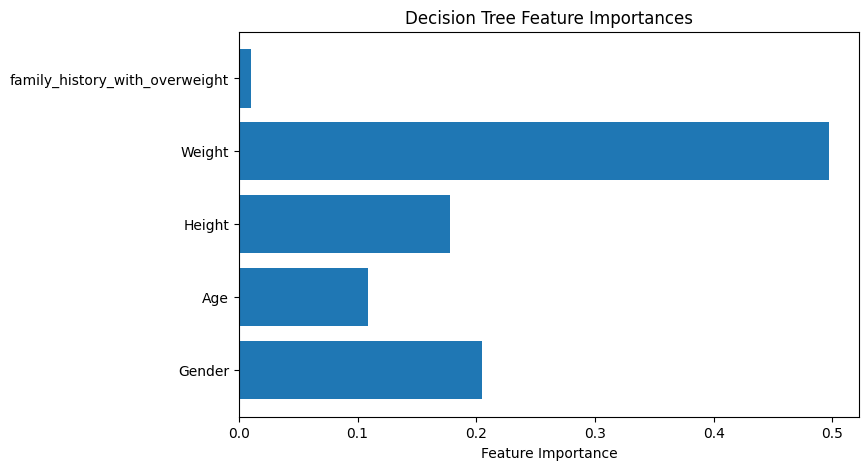

Tree depth: 31
Number of leaves: 2520


In [ ]:

importances = modelDT.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importances")
plt.show()

print(f"Tree depth: {modelDT.get_depth()}")
print(f"Number of leaves: {modelDT.get_n_leaves()}")



Bagged Model

In [ ]:

label_encoder_gender = LabelEncoder()
label_encoder_family = LabelEncoder()

TRAIN['Gender'] = label_encoder_gender.fit_transform(TRAIN['Gender'])
TRAIN['family_history_with_overweight'] = label_encoder_family.fit_transform(TRAIN['family_history_with_overweight'])


X = TRAIN[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight']]
y = TRAIN['NObeyesdad']


label_encoder_target = LabelEncoder()
y_encoded = label_encoder_target.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=8555)

#Bagged model using Decision Tree
base_tree = DecisionTreeClassifier()
model_bag = BaggingClassifier(base_estimator=base_tree, n_estimators=10, random_state=8555)
model_bag.fit(X_train, y_train)

# Predictions
y_pred = model_bag.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder_target.classes_))


C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8644026974951831

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.93      0.92       494
      Normal_Weight       0.86      0.82      0.84       651
     Obesity_Type_I       0.80      0.85      0.82       545
    Obesity_Type_II       0.96      0.95      0.95       653
   Obesity_Type_III       0.99      1.00      0.99       791
 Overweight_Level_I       0.71      0.72      0.71       495
Overweight_Level_II       0.75      0.71      0.73       523

           accuracy                           0.86      4152
          macro avg       0.85      0.85      0.85      4152
       weighted avg       0.86      0.86      0.86      4152



Apply to Test Data

In [ ]:

X_final_test = TEST[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight']]


y_test_pred = model_bag.predict(X_final_test)


y_test_pred_labels = label_encoder_target.inverse_transform(y_test_pred)


TEST['NObeyesdad'] = y_test_pred_labels


first_col_name = TEST.columns[0]
output_df = TEST[[first_col_name, 'NObeyesdad']]


print(output_df.head())

# Save to CSV
#output_df.to_csv('Bag_predictions.csv', index=False)

      id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III


Assumption: PASSED.

Bagging assumes training multiple trees on different samples reduces variance without increasing bias.

Higher overall accuracy shows better generalization due to reduction of variance and increased precision and recall shows no bias introduced. If bias was introduced we would see underperformance in certain classes for precision and recall for bagging, but all classes increase or stay the same.  

In [ ]:
print(" Decision Tree ")
print("Accuracy:", accuracy_score(y_test, modelDT.predict(X_test)))
print(classification_report(y_test, modelDT.predict(X_test), target_names=label_encoder_target.classes_))

print("\n Bagged Model ")
print("Accuracy:", accuracy_score(y_test, model_bag.predict(X_test)))
print(classification_report(y_test, model_bag.predict(X_test), target_names=label_encoder_target.classes_))



=== Decision Tree ===
Accuracy: 0.8386319845857418
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.89      0.89       494
      Normal_Weight       0.82      0.79      0.80       651
     Obesity_Type_I       0.77      0.82      0.79       545
    Obesity_Type_II       0.95      0.93      0.94       653
   Obesity_Type_III       0.99      0.99      0.99       791
 Overweight_Level_I       0.66      0.68      0.67       495
Overweight_Level_II       0.70      0.67      0.68       523

           accuracy                           0.84      4152
          macro avg       0.82      0.83      0.82      4152
       weighted avg       0.84      0.84      0.84      4152


=== Bagged Model ===
Accuracy: 0.8644026974951831
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.93      0.92       494
      Normal_Weight       0.86      0.82      0.84       651
     Obesity_Type_I       0.80      0.85

Random Forest 

In [ ]:

label_encoder_gender = LabelEncoder()
label_encoder_family = LabelEncoder()

TRAIN['Gender'] = label_encoder_gender.fit_transform(TRAIN['Gender'])
TRAIN['family_history_with_overweight'] = label_encoder_family.fit_transform(TRAIN['family_history_with_overweight'])


X = TRAIN[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight']]
y = TRAIN['NObeyesdad']


label_encoder_target = LabelEncoder()
y_encoded = label_encoder_target.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=8555)

# Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=8555)
model_rf.fit(X_train, y_train)

# Predictions
y_pred = model_rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder_target.classes_))



Accuracy: 0.8778901734104047

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.92      0.92       494
      Normal_Weight       0.87      0.83      0.85       651
     Obesity_Type_I       0.84      0.85      0.85       545
    Obesity_Type_II       0.95      0.97      0.96       653
   Obesity_Type_III       0.99      1.00      1.00       791
 Overweight_Level_I       0.73      0.75      0.74       495
Overweight_Level_II       0.76      0.75      0.76       523

           accuracy                           0.88      4152
          macro avg       0.87      0.87      0.87      4152
       weighted avg       0.88      0.88      0.88      4152



Apply to Test Data

In [ ]:

X_final_test = TEST[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight']]


y_test_pred = model_rf.predict(X_final_test)


y_test_pred_labels = label_encoder_target.inverse_transform(y_test_pred)


TEST['NObeyesdad'] = y_test_pred_labels


first_col_name = TEST.columns[0]
output_df = TEST[[first_col_name, 'NObeyesdad']]


print(output_df.head())

# Save to CSV
#output_df.to_csv('RF_predictions.csv', index=False)

      id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III


Feature importance plot for random forest model. 

Note that data leakage is not an issue concerning the weight variable. This is because if obesity level is not present in the data i.e. in TEST data the models need weight along with other variables to classify obesity accurately.   

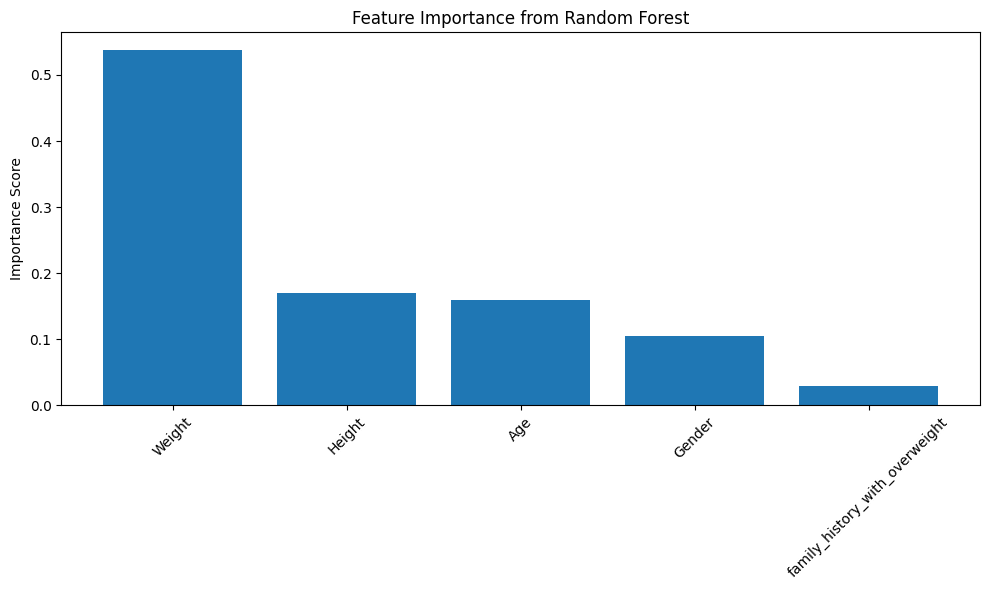

In [ ]:
# Sorted feature imp.
importances = model_rf.feature_importances_
feature_names = X.columns


indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,6))
plt.title("Feature Importance from Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


Assumption:

Combinations of decision trees will reduce variance and improve predictions without adding bias. PASSED.

The higher accuracy of 88% compared to single decision tree and bagged model suggest variance is reduced and predictions improve by ensembling.

Notice how random forest provides a more balanced feature importance plot, very noticable for height, age, and gender. This suggest diversity of trees. However, weight is still very dominant which suggest it is the most predictive feature and trees still rely on it heavily.

Since the average prediction variance across trees is relatively high, 61%, this solidifies the core assumption that the overall ensemble of models produces more generalizable results.

Random Forest Accuracy: 0.8778901734104047


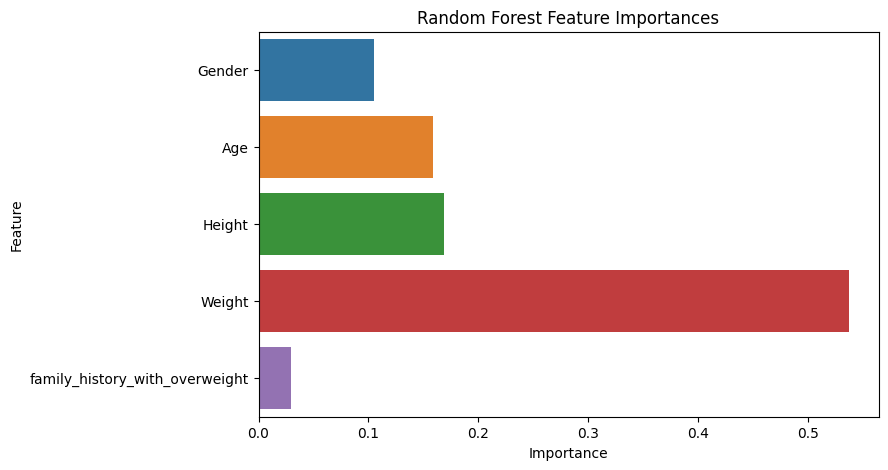

Average prediction variance across trees: 0.6120004335260116


In [ ]:
#Accuracy 
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred)) 


#Feature Imp. plot
feature_importances = model_rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances, y=features)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


#Prediction variance
all_tree_preds = [tree.predict(X_test.values) for tree in model_rf.estimators_]
all_tree_preds = np.array(all_tree_preds)


tree_variances = np.var(all_tree_preds, axis=0)

print("Average prediction variance across trees:", np.mean(tree_variances))




Boosted Model

In [ ]:

label_encoder_gender = LabelEncoder()
label_encoder_family = LabelEncoder()

TRAIN['Gender'] = label_encoder_gender.fit_transform(TRAIN['Gender'])
TRAIN['family_history_with_overweight'] = label_encoder_family.fit_transform(TRAIN['family_history_with_overweight'])


X = TRAIN[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight']]
y = TRAIN['NObeyesdad']


label_encoder_target = LabelEncoder()
y_encoded = label_encoder_target.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=8555)

# Boosted model
model_boo = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=8555)
model_boo.fit(X_train, y_train)

# Predictions
y_pred = model_boo.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder_target.classes_))


Accuracy: 0.8851156069364162

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.95      0.93       494
      Normal_Weight       0.87      0.85      0.86       651
     Obesity_Type_I       0.85      0.86      0.85       545
    Obesity_Type_II       0.95      0.97      0.96       653
   Obesity_Type_III       0.99      1.00      0.99       791
 Overweight_Level_I       0.75      0.74      0.75       495
Overweight_Level_II       0.78      0.77      0.78       523

           accuracy                           0.89      4152
          macro avg       0.87      0.87      0.87      4152
       weighted avg       0.88      0.89      0.88      4152



Apply to Test Data

In [ ]:

X_final_test = TEST[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight']]


y_test_pred = model_boo.predict(X_final_test)


y_test_pred_labels = label_encoder_target.inverse_transform(y_test_pred)


TEST['NObeyesdad'] = y_test_pred_labels


first_col_name = TEST.columns[0]
output_df = TEST[[first_col_name, 'NObeyesdad']]


print(output_df.head())

# Save to CSV
#output_df.to_csv('Boost_predictions.csv', index=False)

      id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III


Assumption:

Weaker classifiers can be combined in a stage-wise manner to correct errors of the previous classifiers: PASSED. The plot below shows that the test accuracy increases and plateaus over boosting iterations. Basically, there is not a large dip in accuracy which indicates the model is successfully learning from previous residuals and not overfitting.

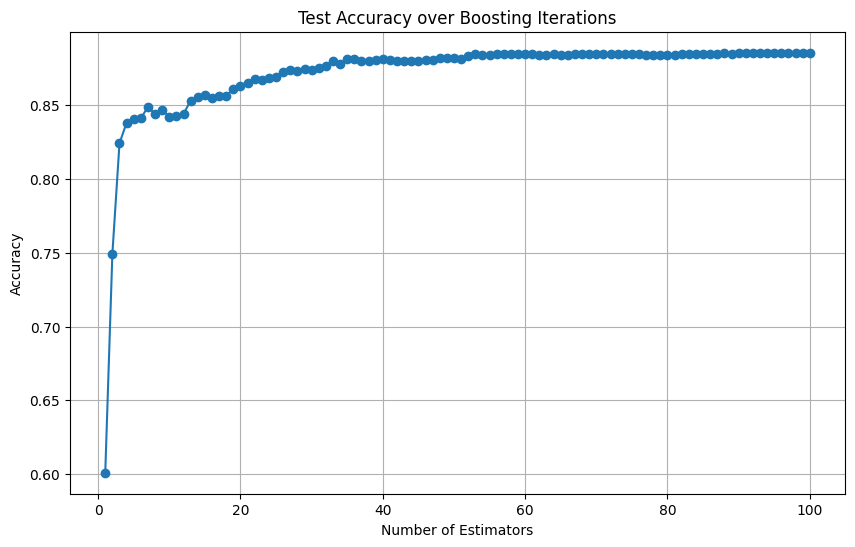

In [ ]:
#Evaluation over iterations
staged_preds = list(model_boo.staged_predict(X_test))

staged_accuracy = [accuracy_score(y_test, pred) for pred in staged_preds]

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(staged_accuracy)+1), staged_accuracy, marker='o')
plt.title('Test Accuracy over Boosting Iterations')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Comparing Model Errors

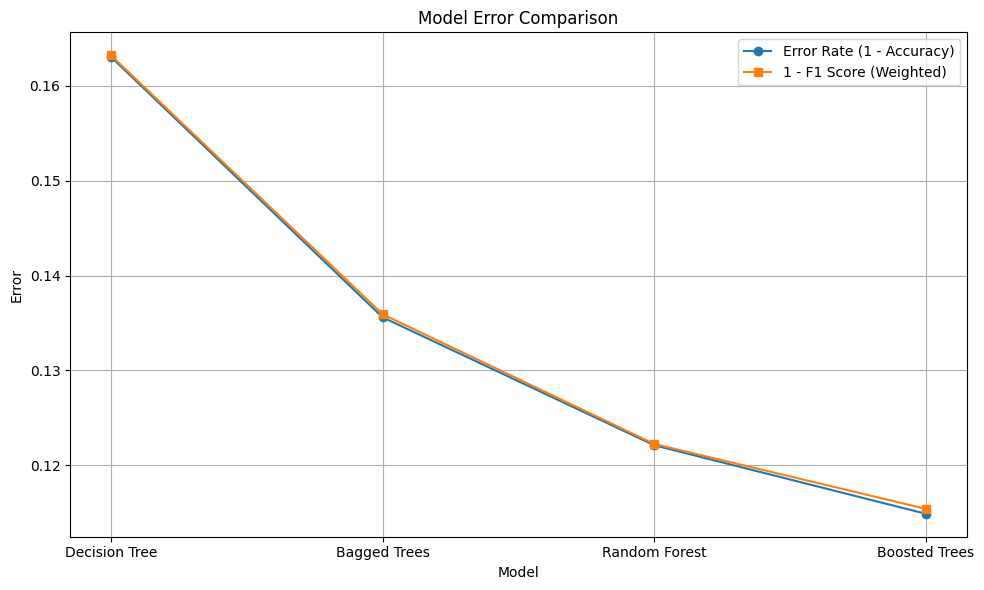

In [ ]:
#Comparing models
model_names = ['Decision Tree', 'Bagged Trees', 'Random Forest', 'Boosted Trees']
accuracies = []
f1_macros = []

for model in [modelDT, model_bag, model_rf, model_boo]:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracies.append(acc)
    f1_macros.append(f1)

plt.figure(figsize=(10,6))
plt.plot(model_names, [1 - a for a in accuracies], marker='o', label='Error Rate (1 - Accuracy)')
plt.plot(model_names, [1 - f for f in f1_macros], marker='s', label='1 - F1 Score (Weighted)')

plt.title("Model Error Comparison")
plt.ylabel("Error")
plt.xlabel("Model")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Confusion Matrices

<Figure size 800x600 with 0 Axes>

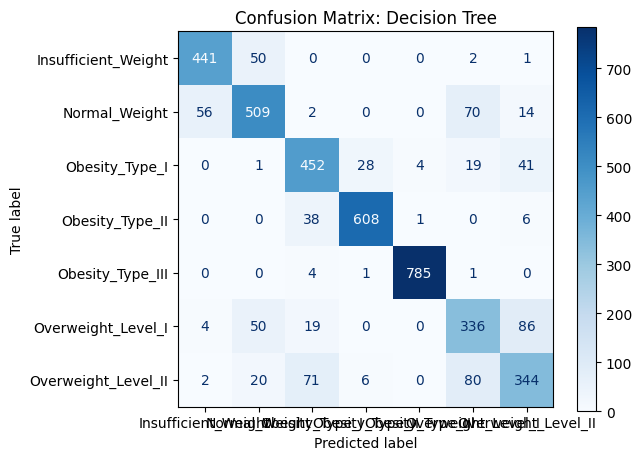

<Figure size 800x600 with 0 Axes>

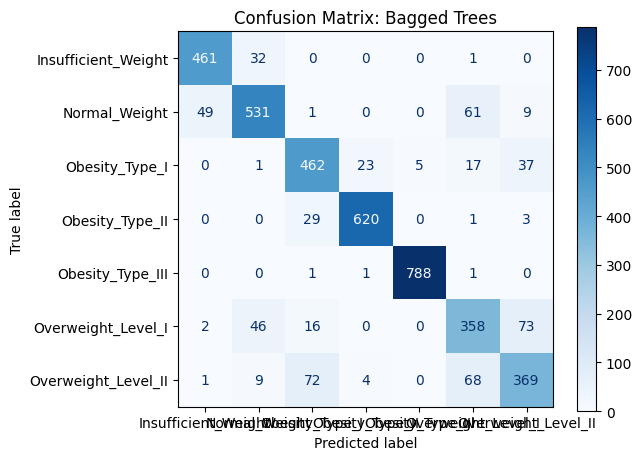

<Figure size 800x600 with 0 Axes>

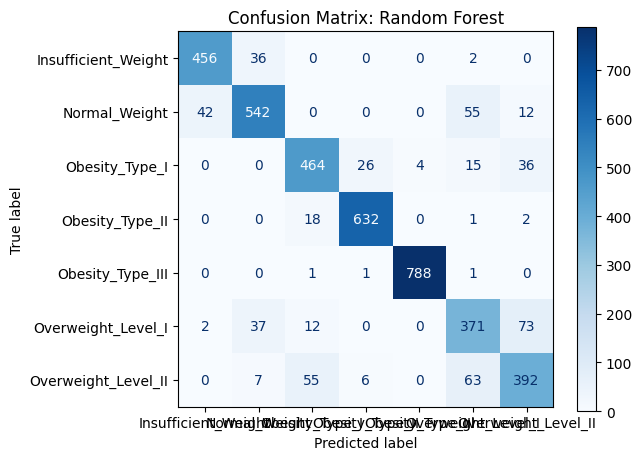

<Figure size 800x600 with 0 Axes>

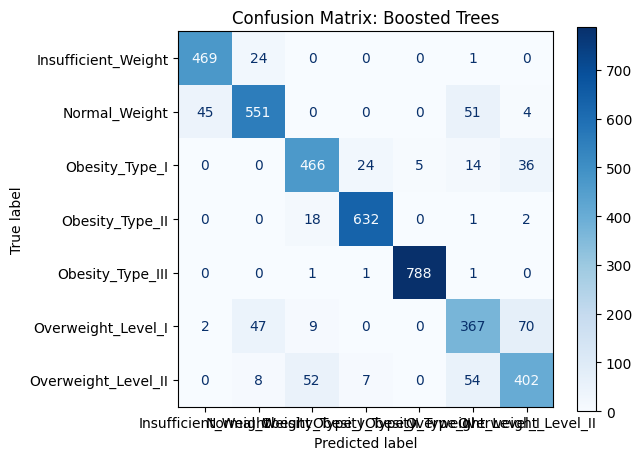

In [ ]:
#Creating conf matrices
model_names = ['Decision Tree', 'Bagged Trees', 'Random Forest', 'Boosted Trees']
models = [modelDT, model_bag, model_rf, model_boo]


for model_name, model in zip(model_names, models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder_target.classes_)

    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.tight_layout()
    plt.show()

